# Setup

## Import libraries

In [1]:
import importlib
from glob import glob

## Import plot_funcs module

This is to select out the latest version of the plot_funcs script to use. By convention, the version of the plot_funcs script is appended to the end of the file name (e.g. plot_funcs_v1h), with later versions having a version number which will be further down an alphanumerically sorted list. This code cell finds all python scripts beginning with "plot_funcs_" then selects out the latest version by finding the last item in an alphanumerically sorted list. Violations to this naming convention may lead to unintended results.

In [2]:
# Choose plot_funcs_ver to use.
pfv = "latest"

assert (isinstance(pfv, str) & (len(pfv) == 5) & (pfv[:3] == "pfv") & 
        pfv[3].isnumeric() & pfv[4].isalpha() & pfv[4].islower()) | (pfv == "latest"), \
    ("pfv must be 'latest' or of form 'pfvXY' where X is a single digit number " +
     "and Y is a lowercase alphabet character. eg. pfv1e")

if pfv == "latest":
    plot_funcs_scripts = glob("plot_funcs_*.py")
    plot_funcs_scripts.sort()
    plot_funcs_module = plot_funcs_scripts[-1][:-3]
    
else:
    plot_funcs_module = "plot_funcs_" + pfv[2:]
    
pf = importlib.import_module(plot_funcs_module)

print(f"Using: {plot_funcs_module}")

Using: calc_funcs_v1p
Using: plot_funcs_v1h


# Create comparison plots

## plot_comp_mdp_clim_stats_given_var_or_dvar

Suppose we were interested in analysing the seasonal differences in the diurnal statistics of mean sea level pressure ("mslp") in a region of South America ("sa"), with default region extents manually defined in the `calc_funcs.py` script. Specifically, we are interested in differences between the wet season from January to June ([1,2,3,4,5,6]) and the dry season from July to December ([7,8,9,10,11,12]), over the period from "Jan-2001" to "Dec-2020". Then we would use the following code:

CREATED: log file for plot_comp_mdp_clim_stats_given_var_or_dvar: ../logs/plot_comp_mdp_clim_stats_given_var_or_dvar/('sa', 'Jan-2001', 'Dec-2020', 'Jan-2001', 'Dec-2020', [1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], 'modis', 'mslp', False, 10, None, None, None, None, True)_cfv1p_2022-11-08-20-46-46.
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_sa_Jan-2001_Dec-2020_1-2-3-4-5-6_glass-mean_modis.nc
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_sa_Jan-2001_Dec-2020_7-8-9-10-11-12_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_sa_Jan-2001_Dec-2020_1-2-3-4-5-6_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_sa_Jan-2001_Dec-2020_7-8-9-10-11-12_glass-mean_modis.nc
Opening: existing file for use in create_individual_diff_plo

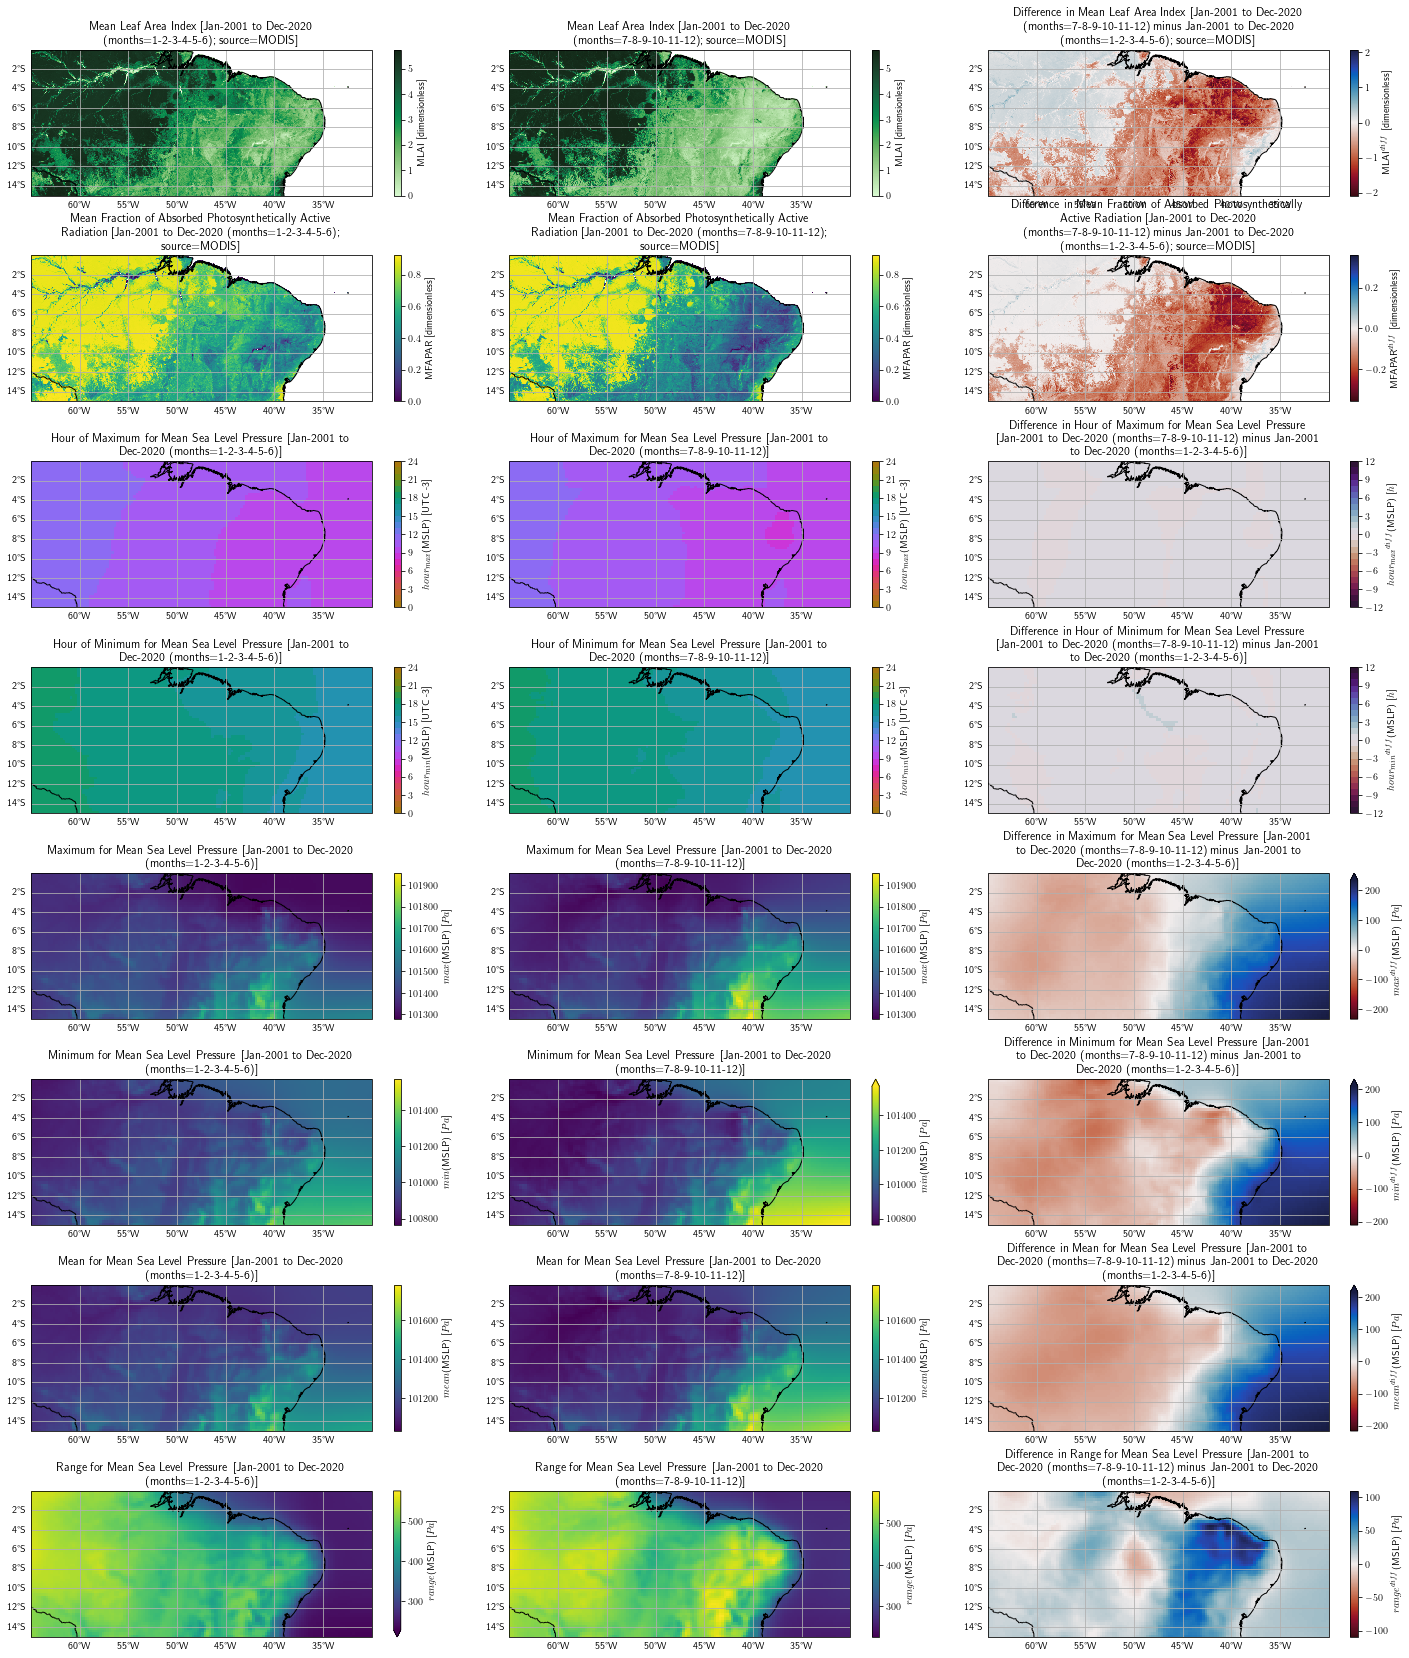

In [3]:
pf.plot_comp_mdp_clim_stats_given_var_or_dvar(
    region="sa", period1_start="Jan-2001", period1_end="Dec-2020", 
    period2_start="Jan-2001", period2_end="Dec-2020", 
    period1_months=[1,2,3,4,5,6], period2_months=[7,8,9,10,11,12], 
    glass_source_pref="modis", var_or_dvar="mslp", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
)

## plot_comp_means_given_layer_and_type

Suppose we were interested in analysing differences in the means between two separate periods for the hourly change in variables ("dvars") at the surface ("sfc"), in a region of Central America ("ca"), with default region extents manually defined in the `calc_funcs.py` script. Specifically, we are interested in differences in means computed over daytime hours from 0800 to 1500 ([8,9,10,11,12,13,14,15]) and the wet season from May to October ([5,6,7,8,9,10]), between the periods from "Jan-2003" to "Dec-2007" and "Jan-2016" to "Dec-2020". Then we would use the following code:

CREATED: log file for plot_comp_means_given_layer_and_type: ../logs/plot_comp_means_given_layer_and_type/('ca', 'Jan-2003', 'Dec-2007', 'Jan-2016', 'Dec-2020', [5, 6, 7, 8, 9, 10], [5, 6, 7, 8, 9, 10], [8, 9, 10, 11, 12, 13, 14, 15], [8, 9, 10, 11, 12, 13, 14, 15], 'modis', 'sfc', 'dvars', False, 10, None, None, None, None, True)_cfv1p_2022-11-08-20-46-59.
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_ca_Jan-2003_Dec-2007_5-6-7-8-9-10_glass-mean_modis.nc
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_ca_Jan-2016_Dec-2020_5-6-7-8-9-10_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_ca_Jan-2003_Dec-2007_5-6-7-8-9-10_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_ca_Jan-2016_Dec-2020_5-6-7-8-9-10_glass-mean_modis.nc
Ope

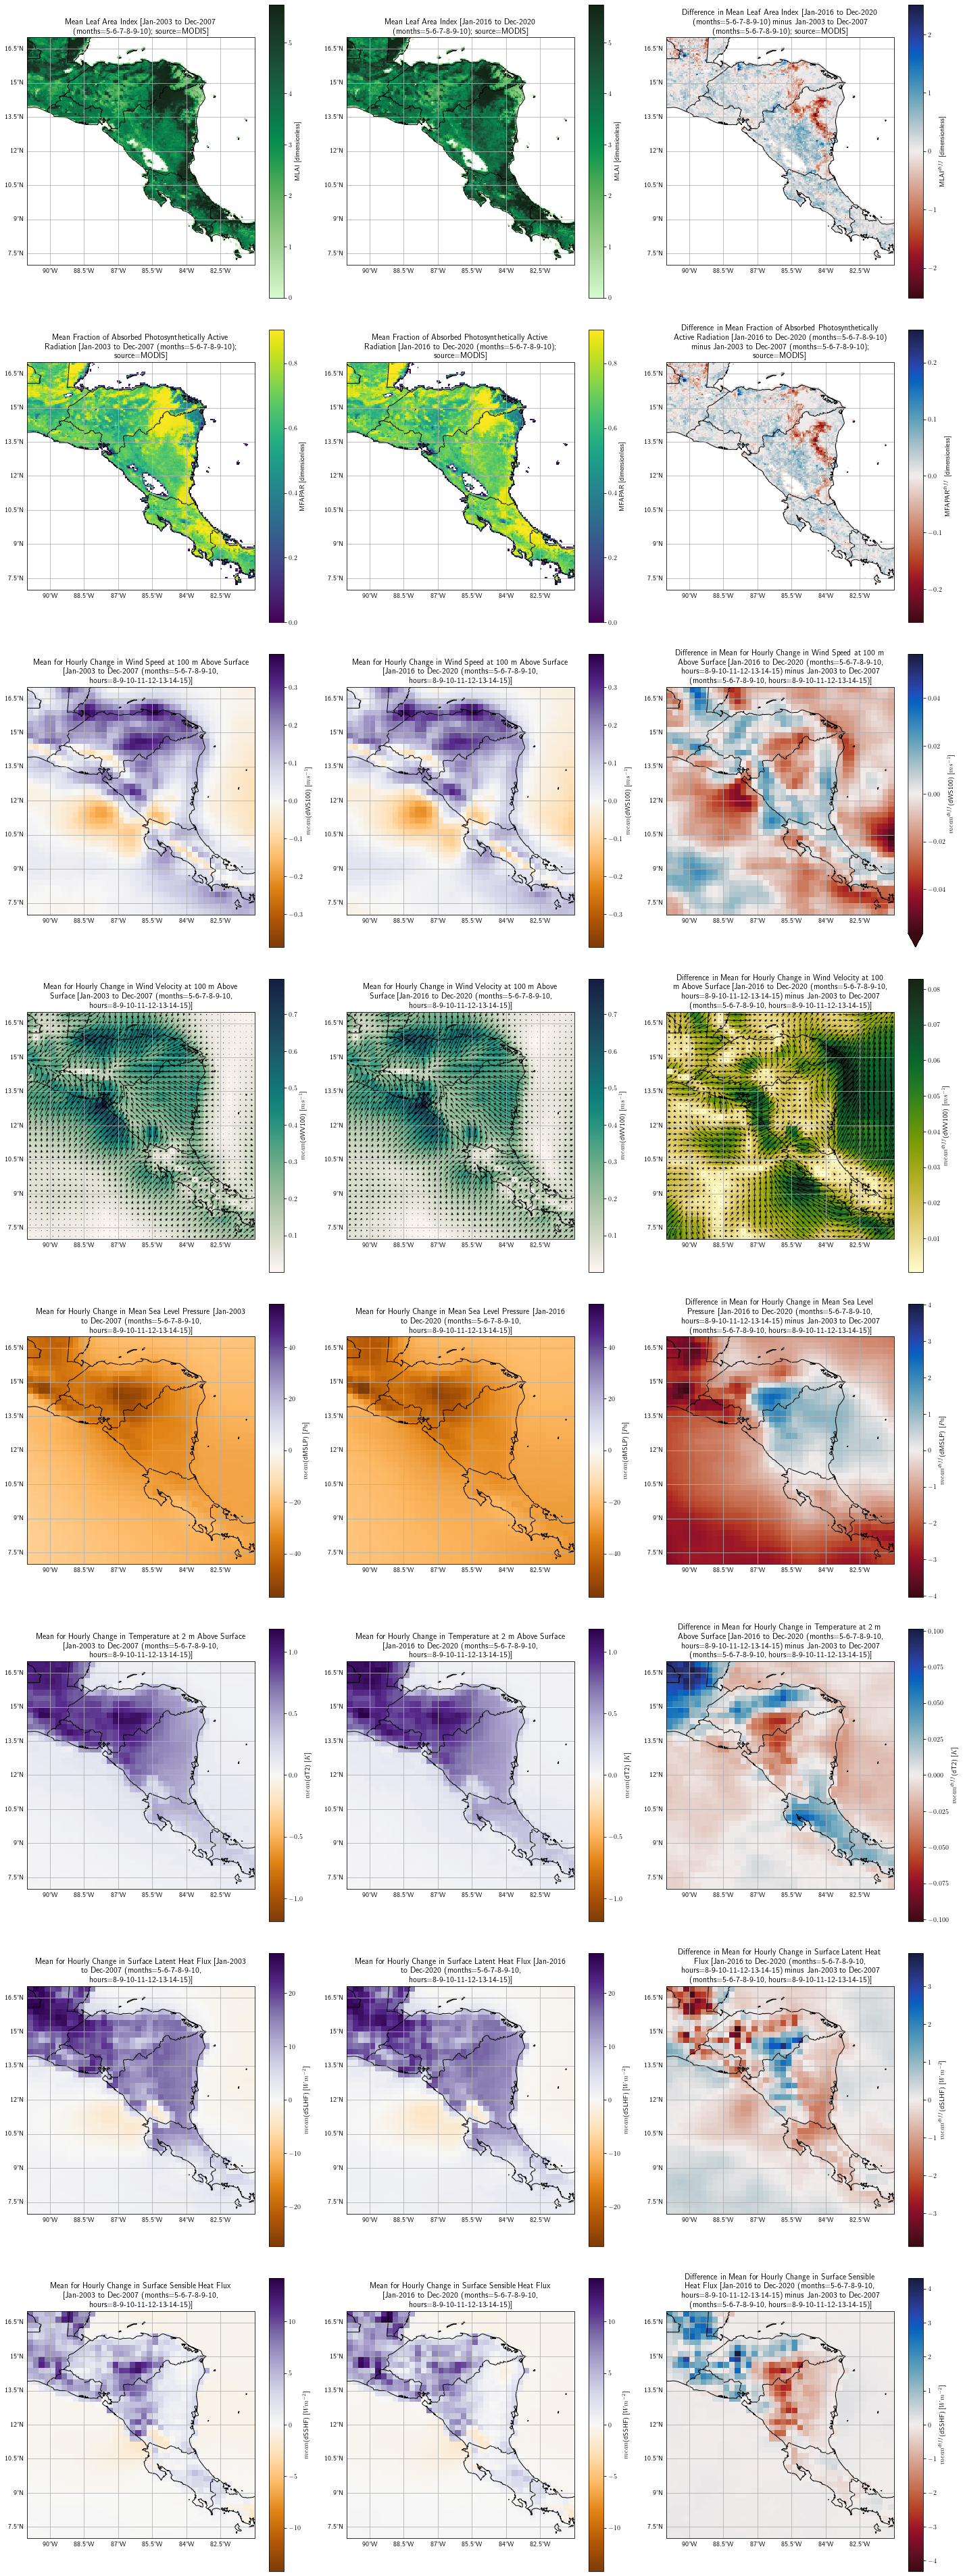

In [4]:
pf.plot_comp_means_given_layer_and_type(
    region="ca", period1_start="Jan-2003", period1_end="Dec-2007", 
    period2_start="Jan-2016", period2_end="Dec-2020", 
    period1_months=[5,6,7,8,9,10], period2_months=[5,6,7,8,9,10], 
    period1_hours=[8,9,10,11,12,13,14,15], period2_hours=[8,9,10,11,12,13,14,15], 
    glass_source_pref="modis", var_or_dvar_layer="sfc", var_or_dvar_type="dvars", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
)

## plot_comp_hourly_means_given_var_or_dvar

Suppose we were interested in analysing the seasonal differences in the hourly means of vertical integral of energy conversion ("viec") in a region of Western Australia ("wa"), with default region extents manually defined in the `calc_funcs.py` script (and the State Boundary Fence of Western Australia is drawn in). Specifically, we are interested in differences between the wet season from July to August ("jja") and the dry season from December to February ("djf"), over the period from "Jan-2001" to "Dec-2020". Then we would use the following code:

CREATED: log file for plot_comp_hourly_means_given_var_or_dvar: ../logs/plot_comp_hourly_means_given_var_or_dvar/('wa', 'Jan-2001', 'Dec-2020', 'Jan-2001', 'Dec-2020', 'jja', 'djf', 'modis', 'viec', '18-23', False, 10, None, None, None, None, True)_cfv1p_2022-11-08-20-47-13.
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_wa_Jan-2001_Dec-2020_jja_glass-mean_modis.nc
Opening: existing file for use in get_common_cbar_limits: ../data_processed/glass_mean_clim/cfv1p_calc_wa_Jan-2001_Dec-2020_djf_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_wa_Jan-2001_Dec-2020_jja_glass-mean_modis.nc
Opening: existing file for use in create_individual_calc_plot: ../data_processed/glass_mean_clim/cfv1p_calc_wa_Jan-2001_Dec-2020_djf_glass-mean_modis.nc
Opening: existing file for use in create_individual_diff_plot: ../data_processed/glass_mean_clim/cfv1p_calc_wa_Jan-2001_De

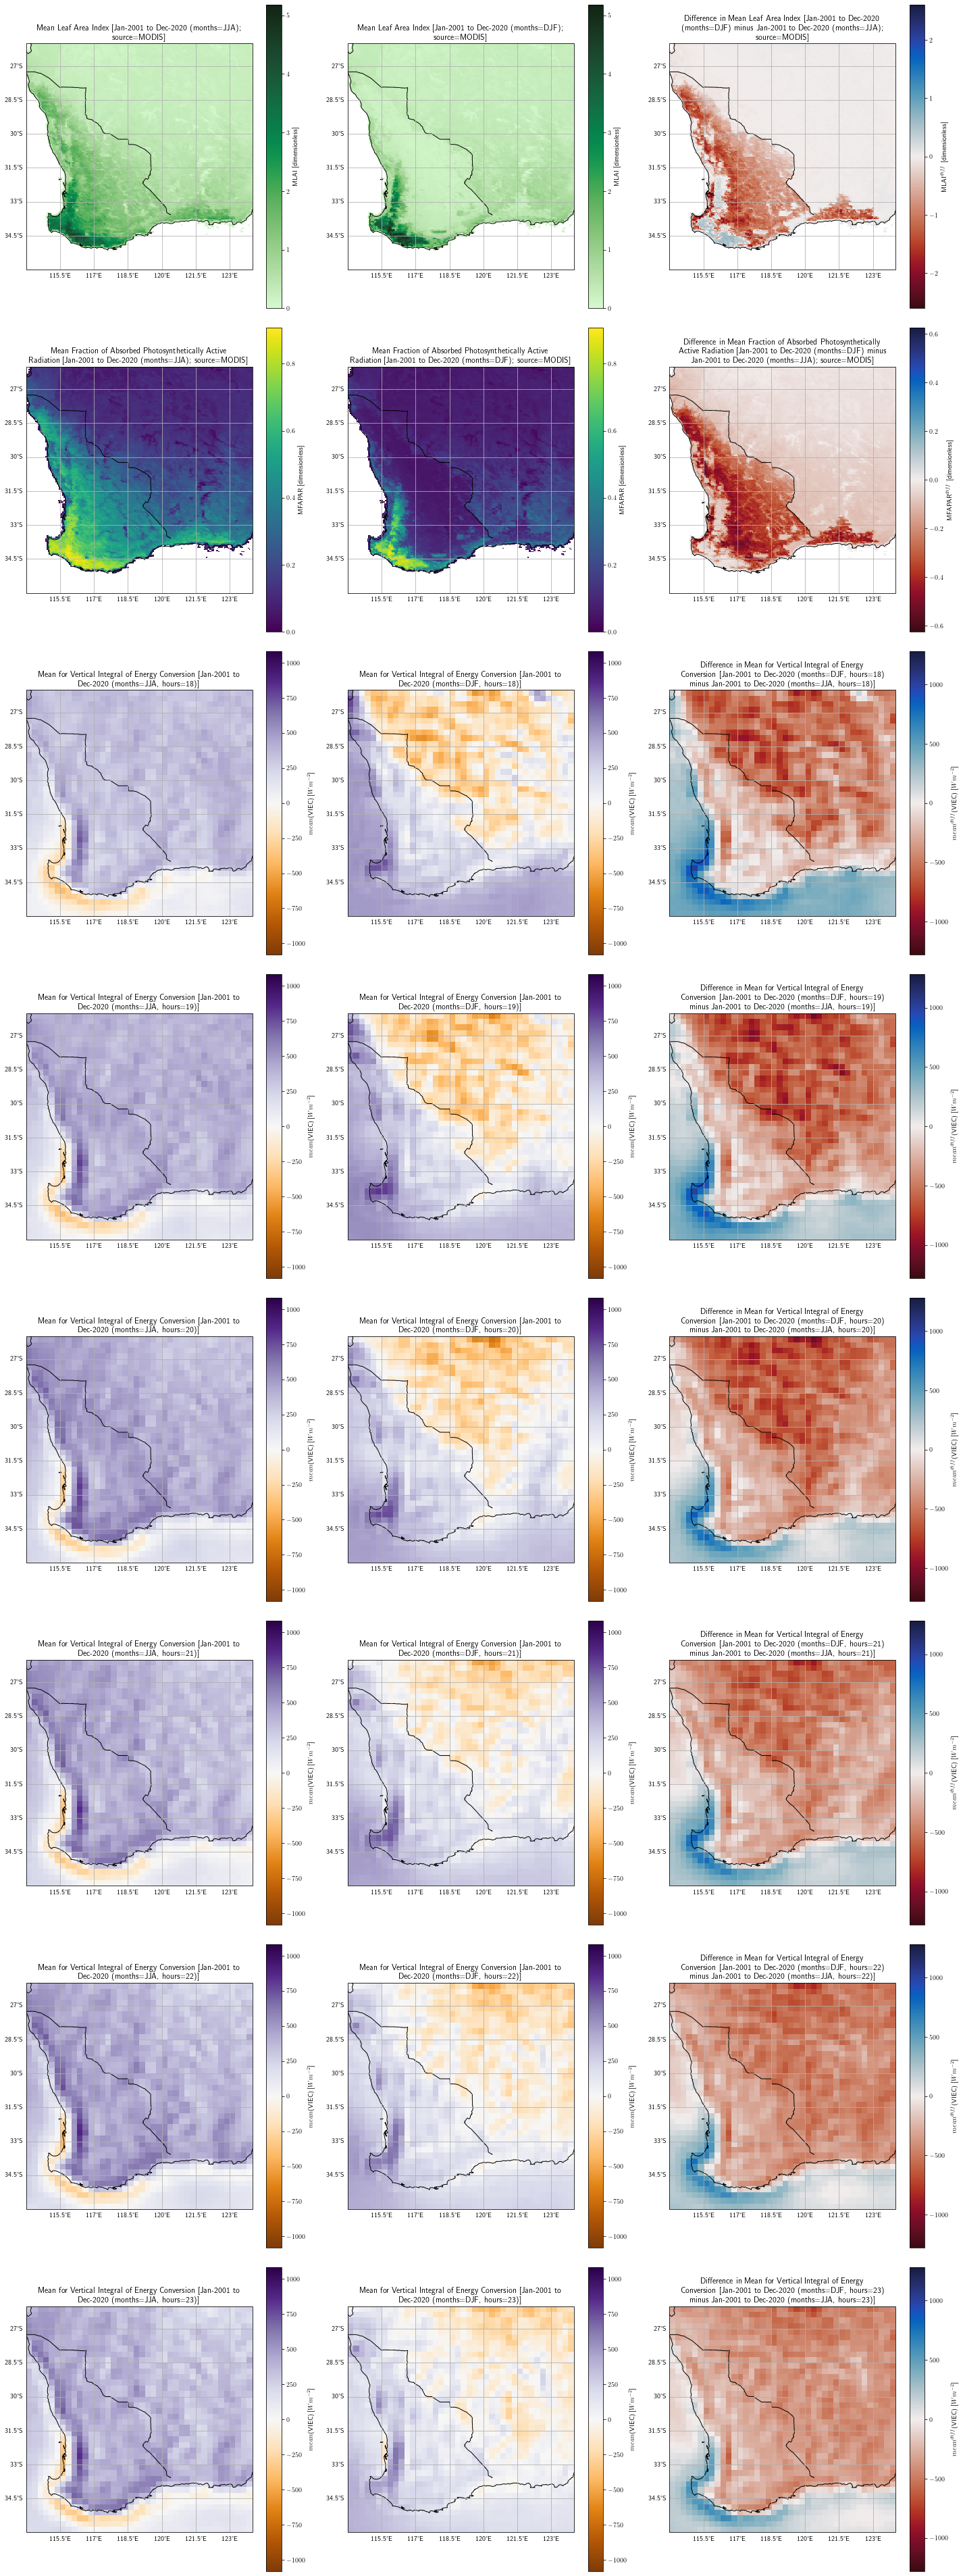

In [5]:
pf.plot_comp_hourly_means_given_var_or_dvar(
    region="wa", period1_start="Jan-2001", period1_end="Dec-2020", 
    period2_start="Jan-2001", period2_end="Dec-2020", 
    period1_months="jja", period2_months="djf", glass_source_pref="modis", 
    var_or_dvar="viec", hours_to_plot="18-23", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
)

# Associated README.md file

# Mini Thesis Project

## Table of contents

- [High-level description of functions](#high-level-description-of-functions)
- [Example usage](#example-usage)
    - [plot_comp_mdp_clim_stats_given_var_or_dvar](#plot_comp_mdp_clim_stats_given_var_or_dvar)
    - [plot_comp_means_given_layer_and_type](#plot_comp_means_given_layer_and_type)
    - [plot_comp_hourly_means_given_var_or_dvar](#plot_comp_hourly_means_given_var_or_dvar)
- [Analysing other regions and variables](#analysing-other-regions-and-variables)
    - [For custom regions](#for-custom-regions)
    - [For arbitrary ERA5 variables](#for-arbitrary-era5-variables)
    - [For novel ERA5-derived variables](#for-novel-era5-derived-variables)
- [Steps to reproduce thesis results from scratch](#steps-to-reproduce-thesis-results-from-scratch)
- [System and time requirements (for reproducing thesis results only)](#system-and-time-requirements-for-reproducing-thesis-results-only)
    

## High-level description of functions

- The functions created in the course of this thesis allow comparison for the mean leaf area index (MLAI) and mean fraction of absorbed photosynthetically active radiation (MFAPAR) between two arbitrary periods (so long as they are within the range of available data from 1981-2021). And the comparison can further be done in terms of a subset of months from each period. So it is possible, for example, to compare the MLAI over the months of January, March and December between 1990-2000 with the MLAI over the months of July and November between 2005-2007. These variables derive from the GLASS dataset.
- These functions also allow comparison for various ERA5 variables between two arbitrary periods in terms of each variable's diurnal profile (can choose subset of months), mean (can choose subset of both months and hours), hourly means for each hour of the day (can choose subset of months), and monthly means for each month of the day (can choose subset of hours).
- For wind speed, there is also a separate function to compute the mean, standard deviation, Weibull distribution parameters resulting from an empirical fit, and other.
- The main data processing functions are contained in the `calc_funcs.py` script in the `scripts` folder.
- The `plot_funcs.py` script in the `scripts` folder is a plotting layer on top of `calc_funcs.py` and contains all the functions for creating comparison plots.
- Most analysis can be done purely using the `plot_funcs.py` script since this was built to automatically invoke any processing functions from `calc_funcs.py` if the processed data file does not already exist.
- The entire code is built around carefully selected names for each file, so it is not recommended to rename any of these files as this may break the code.
- There is a vast array of functions within these scripts but we will describe here only the high-level comparison plot functions. For detail into the other functions, look into the docstrings embedded within each script. At the time of writing, `calc_funcs.py` is fully documented while only the high-level comparison plot functions in `plot_funcs.py` have been documented.
- The high-level comparison plot functions in `plot_funcs.py` are:
    - `plot_comp_mdp_clim_stats_given_var_or_dvar`
    - `plot_comp_means_given_layer_and_type`
    - `plot_comp_hourly_means_given_var_or_dvar`
    - `plot_comp_monthly_means_given_var_or_dvar`
    - `plot_comp_wsd_clim`
- Each of these functions creates an output plot with 3 columns and 8 rows. The left column corresponds to the statistical summaries for the first period of study. The middle column is the same but for the second period. The right column is the difference between periods in the values for each statistical summary (calculated as second period minus first period). For reference, the first two rows will always display MLAI and MFAPAR. The colourbars are automatically standardised to allow fair comparison between periods, months and hours.
- Where spatiotemporal correlations in the left or middle columns hold between an ERA5 statistic and MLAI, this is suggestive that the vegetation cover *may* be responsible for the observed variations in the ERA5 statistic.
- Where spatiotemporal correlations hold between the right column of an ERA5 statistic and the left or middle columns for MLAI, this leaves open the question of what is causing the observed variations in the ERA5 statistic, but suggests that vegetation cover *may* be responsible for modulating these variations.
- Where spatiotemporal correlations hold between the right columns of an ERA5 statistic and MLAI, this is suggestive that the variations in vegetation cover *may* be responsible for the variations in the ERA5 statistic.

## Example usage

### plot_comp_mdp_clim_stats_given_var_or_dvar

Suppose we were interested in analysing the seasonal differences in the diurnal statistics of mean sea level pressure ("mslp") in a region of South America ("sa"), with default region extents manually defined in the `calc_funcs.py` script. Specifically, we are interested in differences between the wet season from January to June ([1,2,3,4,5,6]) and the dry season from July to December ([7,8,9,10,11,12]), over the period from "Jan-2001" to "Dec-2020". Then we would use the following code:

<details>
  <summary>plot_comp_mdp_clim_stats_given_var_or_dvar</summary>
  
  After importing the `plot_funcs.py` script as a module with name `pf`:
    
  ```python
  pf.plot_comp_mdp_clim_stats_given_var_or_dvar(
    region="sa", period1_start="Jan-2001", period1_end="Dec-2020", 
    period2_start="Jan-2001", period2_end="Dec-2020", 
    period1_months=[1,2,3,4,5,6], period2_months=[7,8,9,10,11,12], 
    glass_source_pref="modis", var_or_dvar="mslp", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
  )
  ```
  ![](scripts/examples/pfv1h_cfv1p_comp_sa_Jan-2001_Dec-2020_Jan-2001_Dec-2020_1-2-3-4-5-6_7-8-9-10-11-12_stats_mslp_perc-10_mask1-None_mask2-None.png)
  
</details>

### plot_comp_means_given_layer_and_type

Suppose we were interested in analysing differences in the means between two separate periods for the hourly change in variables ("dvars") at the surface ("sfc"), in a region of Central America ("ca"), with default region extents manually defined in the `calc_funcs.py` script. Specifically, we are interested in differences in means computed over daytime hours from 0800 to 1500 ([8,9,10,11,12,13,14,15]) and the wet season from May to October ([5,6,7,8,9,10]), between the periods from "Jan-2003" to "Dec-2007" and "Jan-2016" to "Dec-2020". Then we would use the following code:

<details>
  <summary>plot_comp_means_given_layer_and_type</summary>
  
  After importing the `plot_funcs.py` script as a module with name `pf`:
    
  ```python
  pf.plot_comp_means_given_layer_and_type(
    region="ca", period1_start="Jan-2003", period1_end="Dec-2007", 
    period2_start="Jan-2016", period2_end="Dec-2020", 
    period1_months=[5,6,7,8,9,10], period2_months=[5,6,7,8,9,10], 
    period1_hours=[8,9,10,11,12,13,14,15], period2_hours=[8,9,10,11,12,13,14,15], 
    glass_source_pref="modis", var_or_dvar_layer="sfc", var_or_dvar_type="dvars", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
  )
  ```
  ![](scripts/examples/pfv1h_cfv1p_comp_ca_Jan-2003_Dec-2007_Jan-2016_Dec-2020_means_5-6-7-8-9-10_5-6-7-8-9-10_8-9-10-11-12-13-14-15_8-9-10-11-12-13-14-15_sfc_dvars_perc-10_mask1-None_mask2-None.png)
  
</details>

### plot_comp_hourly_means_given_var_or_dvar

Suppose we were interested in analysing the seasonal differences in the hourly means of vertical integral of energy conversion ("viec") in a region of Western Australia ("wa"), with default region extents manually defined in the `calc_funcs.py` script (and the State Boundary Fence of Western Australia is drawn in). Specifically, we are interested in differences between the wet season from July to August ("jja") and the dry season from December to February ("djf"), over the period from "Jan-2001" to "Dec-2020". Then we would use the following code:

<details>
  <summary>plot_comp_hourly_means_given_var_or_dvar</summary>
  
  After importing the `plot_funcs.py` script as a module with name `pf`:
    
  ```python
  pf.plot_comp_hourly_means_given_var_or_dvar(
    region="wa", period1_start="Jan-2001", period1_end="Dec-2020", 
    period2_start="Jan-2001", period2_end="Dec-2020", 
    period1_months="jja", period2_months="djf", glass_source_pref="modis", 
    var_or_dvar="viec", hours_to_plot="18-23", 
    perc=False, mask_perc_quantile=pf.mask_perc_quantile_default, 
    mask_period1=None, mask_period2=None, extents=None, cfv_data=None, output=True
  )
  ```
  ![](scripts/examples/pfv1h_cfv1p_comp_wa_Jan-2001_Dec-2020_Jan-2001_Dec-2020_means-hourly_jja_djf_viec_18-23_perc-10_mask1-None_mask2-None.png)
  
</details>

## Analysing other regions and variables

Note: the steps in this section have not been tested as of the time of writing.

### For custom regions

- The default regions and extents in [W, E, S, N] format (for `cartopy` plotting library) used in the thesis project were:
    - "wa": [114, 124, -36, -26]
    - "ca": [-91, -81, 7, 17]
    - "sa": [-65, -30, -15, 0]
- To add a custom region:
    1. Edit the `area` variable in `data_download.ipynb` or `data_download.py` to include the name of the new region and its extents in [N, W, S, E] format (for ECMWF CDS API)
    2. Edit the first argument in the `retrieve_era5_slv_month_hour` and `retrieve_era5_slv_hour` functions so that it reflects the name of the new region
    3. Run the edited `data_download.ipynb` or `data_download.py` to download the relevant ERA5 data from ECMWF
    4. Edit the `regions` variable in the `calc_funcs.py` script to include the new region's name, extents in [W, E, S, N] format, and local timezone relative to UTC

### For arbitrary ERA5 variables

- The ERA5 variables obtained from ECMWF for use in the thesis project by default were (using naming conventions from https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation): 
    - `'100m_u_component_of_wind'`
    - `'100m_v_component_of_wind'`
    - `'10m_u_component_of_wind'`
    - `'10m_v_component_of_wind'`
    - `'2m_temperature'`
    - `'mean_sea_level_pressure'`
    - `'surface_latent_heat_flux'`
    - `'surface_sensible_heat_flux'`
    - `'evaporation'`
    - `'total_column_cloud_liquid_water'`
    - `'otal_column_water_vapour'`
    - `'vertical_integral_of_divergence_of_moisture_flux'`
    - `'vertical_integral_of_energy_conversion'`
    - `'vertical_integral_of_kinetic_energy'`
    - `'convective_inhibition'`
    - `'forecast_albedo'`
    - `'total_cloud_cover'`
- To add an arbitrary ERA5 variable:
    1. Edit the `vars_era5` variable in `data_download.ipynb` or `data_download.py` to include the name of the new variable using the ERA5 variable names from https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation
    2. Place the variable within one of the existing "sfc", "atm" or "cld" categories
    3. (Alternatively) Create a new category with the variable and add additional code cells with the new category name as an argument into the `retrieve_era5_slv_month_hour` and `retrieve_era5_slv_hour` functions
    4. Run the edited `data_download.ipynb` or `data_download.py` to download the relevant ERA5 data from ECMWF CDS
    5. Edit the `vars_and_dvars_era5`, `vars_dep_and_rename` and `attrs_da` variables in the `calc_funcs.py` script to reflect this new variable
    6. Edit the try-except blocks in the `plot_means_given_layer_and_type`, `plot_diff_means_given_layer_and_type` and `plot_comp_means_given_layer_and_type` functions in the `plot_funcs.py` script so that a total of 6 ERA5 variables will be displayed at all times (this is an unfortunate design constraint from displaying 8 rows for the comparison plots with the first 2 rows occupied by MLAI and MFAPAR)

### For novel ERA5-derived variables

- The default ERA5-derived variables used in the thesis project were:
    - Instantaneous approximation (with negative sign reversed and units converted) for Surface Latent Heat Flux (SLHF)
    - Instantaneous approximation (with negative sign reversed and units converted) for Surface Sensible Heat Flux (SSHF)
    - Instantaneous approximation (with negative sign reversed and units converted) for Net Surface Evaporation (NSE)
    - Approximation for Net Atmospheric Condensation (NAC)
- To incorporate a novel ERA5-derived variable:
    1. Insert an if statement into the `calc_era5_mdp_clim_given_var_or_dvar` function in the `calc_funcs.py` script (this is the function which is furthest upstream and from which other computations apart from wind speed distribution derive from) using the same style and logic as that for NAC in the script
    2. Edit the `vars_and_dvars_era5`, `vars_dep_and_rename` and `attrs_da` variables in the `calc_funcs.py` script to reflect this new variable
    3. Edit the try-except blocks in the `plot_means_given_layer_and_type`, `plot_diff_means_given_layer_and_type` and `plot_comp_means_given_layer_and_type` functions in the `plot_funcs.py` script so that a total of 6 ERA5 variables will be displayed at all times (this is an unfortunate design constraint from displaying 8 rows for the comparison plots with the first 2 rows occupied by MLAI and MFAPAR)

## Steps to reproduce thesis results from scratch
Note: The original project scope included analysis for WA, CA and NB but this was cut short to only WA due to time constraints.
1. (If haven't already) Install miniconda for Python 3.9 or later using instructions from  https://docs.conda.io/en/latest/miniconda.html
2. Download thesis repository by entering `git clone https://github.com/anthonylst6/thesis.git` into a bash shell (Terminal for Linux or Mac, Git Bash recommended for Windows) or clicking Code -> Download ZIP on Github then unzip the folder
3. Open bash shell in home directory of repository then run `conda env create -f env_thesis.yml`
4. (If haven't already) Set up ECMWF CDS API using instructions from https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5#HowtodownloadERA5-4-DownloadERA5familydatathroughtheCDSAPI
5. Download raw data by entering `conda activate thesis` into bash shell then running the `data_download.ipynb` notebook in the `scripts` directory (open the notebook by running `jupyter lab &` in the bash shell)
6. (Alternatively) Enter `conda run -n thesis python data_download.py` into bash shell from the `scripts` directory
7. (For proper rendering of figures) Make sure that a $\LaTeX$ distribution is installed
8. Reproduce results by running the `results.ipynb` notebook in the `scripts` directory for different focus regions by commenting and uncommenting relevant code (again use `jupyter lab &` from bash shell to open notebooks)
9. (Alternatively) Enter `conda run -n thesis python results_wa.py`, `conda run -n thesis python results_ca.py` and `conda run -n thesis python results_sa.py` into bash shell from the `scripts` directory
10. (If personal computer is limited in RAM) Edit the `results_wa.pbs`, `results_ca.pbs` and `results_sa.pbs` job scripts in the `scripts` directory to be compatible with target HPC facility (the provided scripts were designed for the UNSW Katana computational cluster), then submit these as a batch job

## System and time requirements (for reproducing thesis results only)
- For Western Australia (WA) raw data and results, up to 25 GB of storage, up to a day for raw data download (due to queueing in ECMWF CDS), and for data processing up to 60 GB of RAM over 12 hours if using 8 CPUs
- For Central America (CA) raw data and results, up to 25 GB of storage, up to a day for raw data download (due to queueing in ECMWF CDS), and for data processing up to 60 GB of RAM over 12 hours if using 8 CPUs
- For South America (SA) raw data and results, up to 80 GB of storage, 1-2 days for raw data download (due to queueing in ECMWF CDS), and for data processing up to 140 GB of RAM over 12 hours if using 8 CPUs
- The data processing can also be run with less RAM and fewer CPU cores but this will be slower and will require manual restarting of code everytime RAM limit is reached (the code was designed to pick up from where it left off). But in this case there should at least be 8 GB of RAM for WA and CA results, and at least 24 GB of RAM for NB results (if using 4 CPU cores).